https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1

http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

https://stackoverflow.com/questions/18351932/animate-points-with-labels-with-matplotlib?noredirect=1&lq=1

In [1]:
import numpy as np
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import FuncFormatter, MultipleLocator
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('country_daily_cfirmed_pvt.csv')

In [3]:
df = df.T
df.columns = df.loc['countryName'].values
df = df.drop(index=['countryName'])
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
df.index = df.index.date

In [4]:
df.head()

,US,Italy,China,Spain,Germany,France,Iran,UK,Switzerland,South Korea,...,Greenland,Timor-Leste,Cape Verde,Papua New Guinea,Cayman Islands,Channel Islands,Curacao,Saint Barthelemy,East Timor,Gibraltar
2020-01-24,2,0,868,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,1,0,1329,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,3,0,2029,0,0,3,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,3,0,2853,0,0,3,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,3,0,4627,0,4,4,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2020-01-24 to 2020-03-27
Columns: 195 entries, US to Gibraltar
dtypes: object(195)
memory usage: 98.0+ KB


In [6]:
DATESFMT = DateFormatter('%m-%d')

def thousands(x, pos):
    return '%1.0f' % (x * 1e-3)

formatter_thousands = FuncFormatter(thousands)

<IPython.core.display.Javascript object>


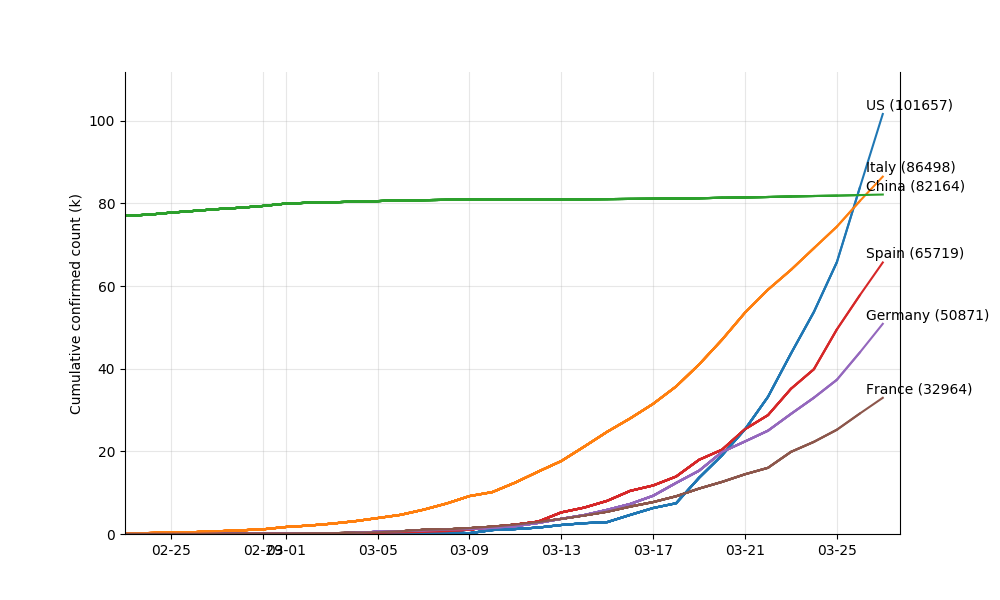

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [7]:
%matplotlib notebook
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
axarr.set_xlim(left = date(2020, 2, 23), right=df.index.max()+relativedelta(hours=18))
axarr.set_ylim(bottom=0, top=df.iloc[:, 0].max()*1.1)
axarr.set_ylabel('Cumulative confirmed count (k)')
axarr.spines['top'].set_visible(False)
axarr.grid(which='major', alpha=0.3)
axarr.xaxis.set_major_formatter(DATESFMT)
axarr.yaxis.set_major_formatter(formatter_thousands)

annotation_us = axarr.annotate('US (0)', xy=(date(2020, 2, 22), 0), xytext=(date(2020, 2, 22),0))
annotation_it = axarr.annotate('Italy (0)', xy=(date(2020, 2, 22), 0), xytext=(date(2020, 2, 22),0))
annotation_cn = axarr.annotate('China (0)', xy=(date(2020, 2, 22), 0), xytext=(date(2020, 2, 22),0))
annotation_es = axarr.annotate('Spain (0)', xy=(date(2020, 2, 22), 0), xytext=(date(2020, 2, 22),0))
annotation_de = axarr.annotate('Germany (0)', xy=(date(2020, 2, 22), 0), xytext=(date(2020, 2, 22),0))
annotation_fr = axarr.annotate('France (0)', xy=(date(2020, 2, 22), 0), xytext=(date(2020, 2, 22),0))



In [8]:
def animate(i):
    data = df.loc[date(2020, 2, 23):, :].iloc[:int(i+1)] #select data range
    p_us = axarr.plot(data.index, data['US'],
                      label='US', color='tab:blue')
    p_italy = axarr.plot(data.index, data['Italy'],
                         label='Italy', color='tab:orange')
    p_cn = axarr.plot(data.index, data['China'],
                      label='China', color='tab:green')
    p_spain = axarr.plot(data.index, data['Spain'],
                         label='Spain', color='tab:red')
    p_germany = axarr.plot(data.index, data['Germany'],
                           label='Germany', color='tab:purple')
    p_france = axarr.plot(data.index, data['France'],
                          label='France', color='tab:brown')
    
#     plt.legend(['US', 'Italy', 'China', 'Spain', 'Germany', 'France'])
    
    annotation_us.set_position((data.index.max()+relativedelta(hours=-18),
                                data['US'].max()+1000))
    annotation_us.xy = (data.index.max()+relativedelta(hours=-18),
                        data['US'].max()+1000)
    annotation_us.set_text('US (%d)' % data['US'].max())

    annotation_it.set_position((data.index.max()+relativedelta(hours=-18),
                                data['Italy'].max()+1000))
    annotation_it.xy = (data.index.max()+relativedelta(hours=-18),
                        data['Italy'].max()+1000)
    annotation_it.set_text('Italy (%d)' % data['Italy'].max())

    annotation_cn.set_position((data.index.max()+relativedelta(hours=-18),
                                data['China'].max()+1000))
    annotation_cn.xy = (data.index.max()+relativedelta(hours=-18),
                        data['China'].max()+1000)
    annotation_cn.set_text('China (%d)' % data['China'].max())

    annotation_es.set_position((data.index.max()+relativedelta(hours=-18),
                                data['Spain'].max()+1000))
    annotation_es.xy = (data.index.max()+relativedelta(hours=-18),
                        data['Spain'].max()+1000)
    annotation_es.set_text('Spain (%d)' % data['Spain'].max())

    annotation_de.set_position((data.index.max()+relativedelta(hours=-18),
                                data['Germany'].max()+1000))
    annotation_de.xy = (data.index.max()+relativedelta(hours=-18),
                        data['Germany'].max()+1000)
    annotation_de.set_text('Germany (%d)' % data['Germany'].max())

    annotation_fr.set_position((data.index.max()+relativedelta(hours=-18),
                                data['France'].max()+1000))
    annotation_fr.xy = (data.index.max()+relativedelta(hours=-18),
                        data['France'].max())
    annotation_fr.set_text('France (%d)' % data['France'].max())



In [9]:
ctry_ts = animation.FuncAnimation(fig, animate, frames=51, repeat=True,
                                  interval=500, repeat_delay=2000)
# ctry_ts.save('top6_countries_animated_legend.html')
